In [38]:
import scanpy as sc
import seaborn as sns

In [61]:
sc.settings.verbosity = 0
sc.settings.set_figure_params(
    dpi=120,
    facecolor="white",
    frameon=False,
    fontcolor="white",
)

TypeError: ScanpyConfig.set_figure_params() got an unexpected keyword argument 'fontcolor'

In [27]:
adata = sc.datasets.ebi_expression_atlas('E-MTAB-10885')

In [28]:
sc.pp.filter_genes(adata, min_cells=10)
sc.pp.filter_cells(adata, min_genes=200)

In [29]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [30]:
sc.pp.pca(adata)

In [31]:
sc.pp.neighbors(adata)

In [32]:
adata.shape

(22063, 20841)

In [33]:
adata.var_names_make_unique()
adata.shape

(22063, 20841)

In [34]:
# mitochondrial genes
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes.
adata.var["hb"] = adata.var_names.str.contains(("^HB[^(P)]"))

In [37]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, percent_top=[20], log1p=True
)
adata

AnnData object with n_obs × n_vars = 22063 × 20841
    obs: 'Sample Characteristic[organism]', 'Sample Characteristic Ontology Term[organism]', 'Sample Characteristic[individual]', 'Sample Characteristic Ontology Term[individual]', 'Sample Characteristic[sex]', 'Sample Characteristic Ontology Term[sex]', 'Sample Characteristic[age]', 'Sample Characteristic Ontology Term[age]', 'Sample Characteristic[developmental stage]', 'Sample Characteristic Ontology Term[developmental stage]', 'Sample Characteristic[phenotype]', 'Sample Characteristic Ontology Term[phenotype]', 'Sample Characteristic[disease]', 'Sample Characteristic Ontology Term[disease]', 'Sample Characteristic[parity]', 'Sample Characteristic Ontology Term[parity]', 'Sample Characteristic[infant age]', 'Sample Characteristic Ontology Term[infant age]', 'Sample Characteristic[organism part]', 'Sample Characteristic Ontology Term[organism part]', 'Sample Characteristic[cell type]', 'Sample Characteristic Ontology Term[cell type]'

In [49]:
sc.tl.umap(adata)
sc.tl.leiden(adata)

/var/folders/4c/fcxlqxc9641fxb8yx65cxfgm0000gp/T/ipykernel_20279/1561440278.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


In [64]:
adata

AnnData object with n_obs × n_vars = 22063 × 20841
    obs: 'Sample Characteristic[organism]', 'Sample Characteristic Ontology Term[organism]', 'Sample Characteristic[individual]', 'Sample Characteristic Ontology Term[individual]', 'Sample Characteristic[sex]', 'Sample Characteristic Ontology Term[sex]', 'Sample Characteristic[age]', 'Sample Characteristic Ontology Term[age]', 'Sample Characteristic[developmental stage]', 'Sample Characteristic Ontology Term[developmental stage]', 'Sample Characteristic[phenotype]', 'Sample Characteristic Ontology Term[phenotype]', 'Sample Characteristic[disease]', 'Sample Characteristic Ontology Term[disease]', 'Sample Characteristic[parity]', 'Sample Characteristic Ontology Term[parity]', 'Sample Characteristic[infant age]', 'Sample Characteristic Ontology Term[infant age]', 'Sample Characteristic[organism part]', 'Sample Characteristic Ontology Term[organism part]', 'Sample Characteristic[cell type]', 'Sample Characteristic Ontology Term[cell type]'

In [71]:
adata.obs.leiden

ERR6548285-AAAACTCGTTATGTGC    11
ERR6548285-AAACCTATCTCCAACC     0
ERR6548285-AAACCTGAGAAGGACA    11
ERR6548285-AAACCTGAGACAAGCC     0
ERR6548285-AAACCTGAGAGGTTAT     0
                               ..
ERR6548288-TTTGTCATCATTGCGA     1
ERR6548288-TTTGTCATCGACAGCC     8
ERR6548288-TTTGTCATCTCACATT     8
ERR6548288-TTTGTCATCTCGGACG    16
ERR6548288-TTTGTCATCTGCTTGC    16
Name: leiden, Length: 22063, dtype: category
Categories (21, object): ['0', '1', '2', '3', ..., '17', '18', '19', '20']

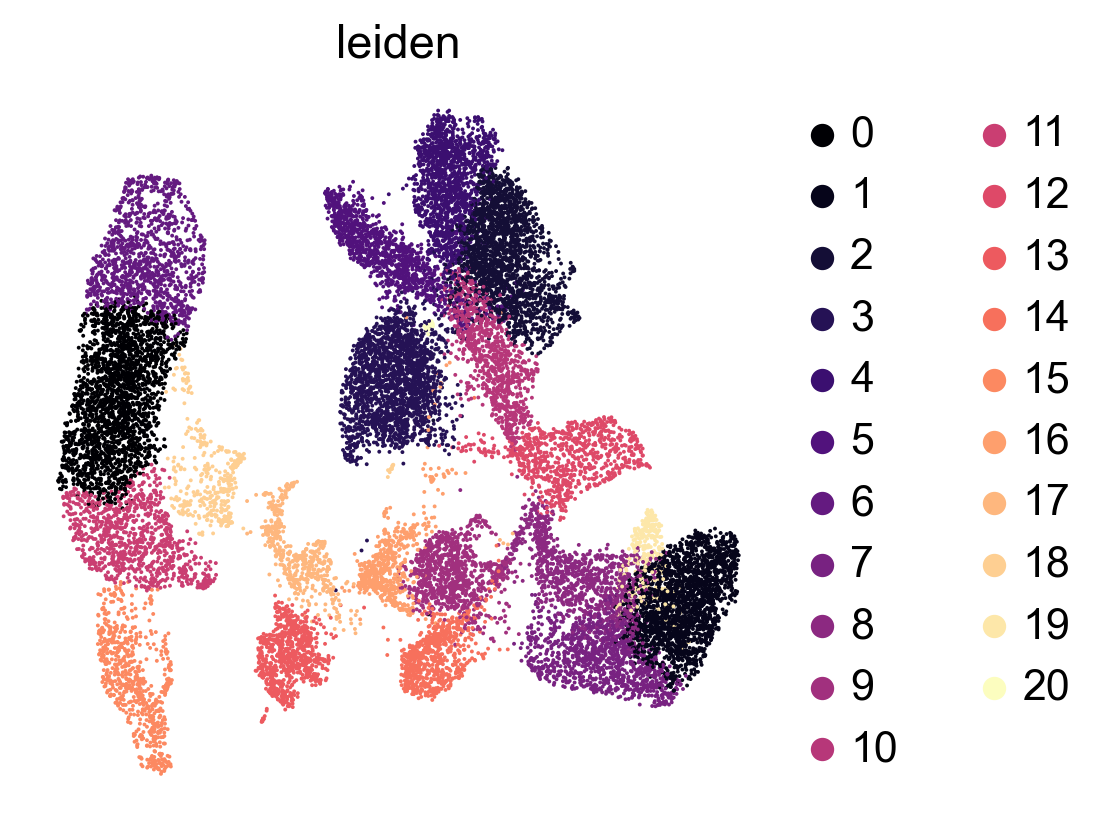

In [63]:
sc.pl.umap(adata, color=["leiden"], palette="magma")

In [73]:
from lets_plot import *
LetsPlot.setup_html()

ModuleNotFoundError: No module named 'lets_plot'